# ----x----Credit Card Fraud Detection----x----

Dataset link :- https://www.kaggle.com/datasets/kartik2112/fraud-detection

# Dataset Preprocessing

## Import necessary libraries

In [23]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [24]:
train_data = pd.read_csv(r'D:\Academic\Bachelor\Study_Purpose\My_Git\CodSoft\Task3_Credit_Card_Fraud_Detection\fraudTrain.csv')
test_data = pd.read_csv(r'D:\Academic\Bachelor\Study_Purpose\My_Git\CodSoft\Task3_Credit_Card_Fraud_Detection\fraudTest.csv')

## Data Exploration

In [25]:
train_data.head

<bound method NDFrame.head of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann 

In [26]:
test_data.head

<bound method NDFrame.head of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   

In [27]:
train_data.shape

(1296675, 23)

In [28]:
test_data.shape

(555719, 23)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [30]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Dealing with missing values

In [31]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [32]:
print(train_data['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


## Histogram 

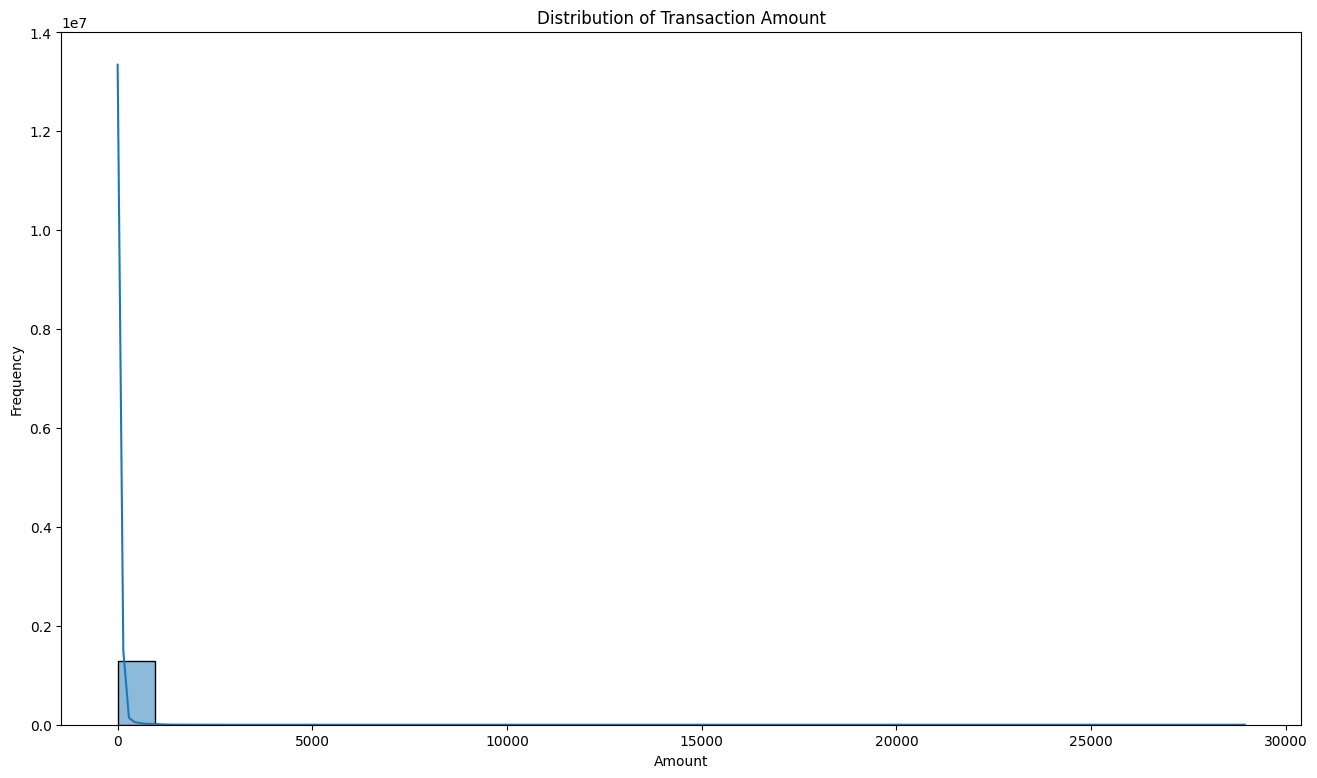

In [33]:

plt.figure(figsize=(16, 9))
sns.histplot(train_data['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Count Plot

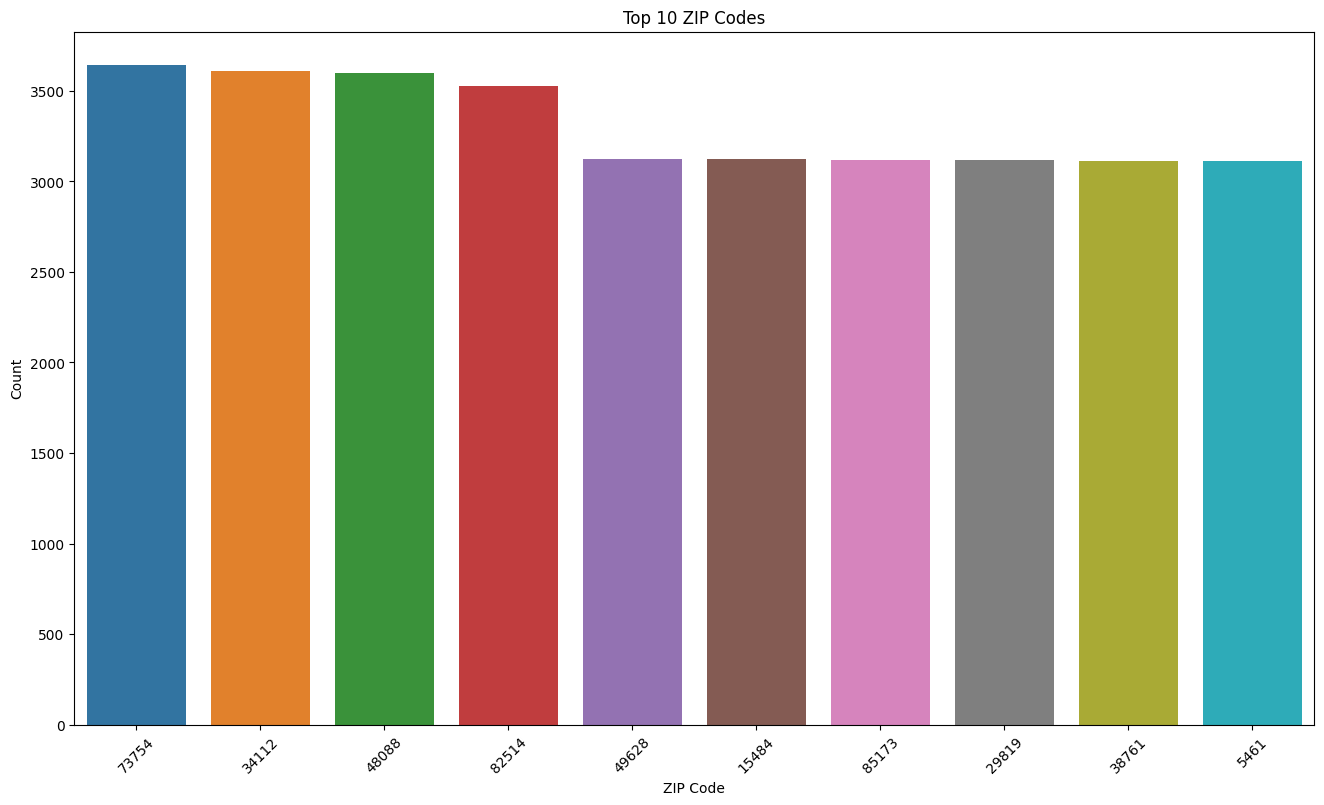

In [34]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train_data['zip'].value_counts().head(10).index
plt.figure(figsize=(16, 9))
sns.countplot(x='zip', data=train_data[train_data['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Heatmap

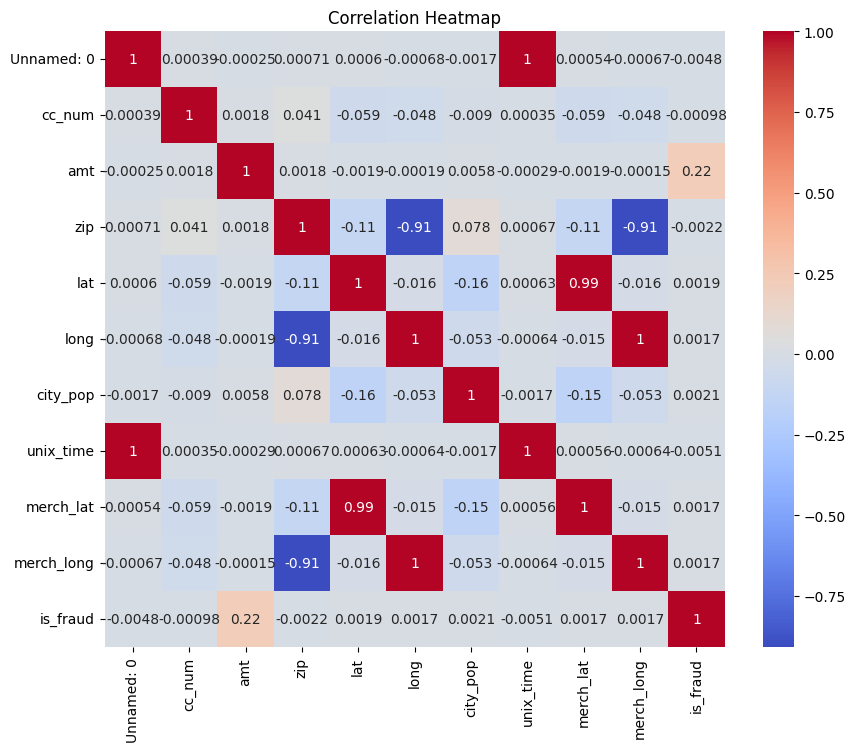

In [35]:
# Exclude non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Fill missing values

In [36]:

train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)

In [37]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_data[features]
Y = train_data['is_fraud']

## Spliting the dataset

In [38]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build Model

## 1)Logistic Regression model

In [39]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9941388551487458


## 2)Decision Tree model

In [40]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9925925925925926


## 3)Random Forest model

In [41]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9961941118630343


In [42]:
# Compare accuracies
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.9941388551487458
Decision Tree Accuracy: 0.9925925925925926
Random Forest Accuracy: 0.9961941118630343


## Best Model

In [43]:
# Find the best classifier
best_accuracy = max(lr_accuracy, dt_accuracy, rf_accuracy)
if best_accuracy == lr_accuracy:
    best_model = lr_model
    best_model_name = "Logistic Regression"
elif best_accuracy == dt_accuracy:
    best_model = dt_model
    best_model_name = "Decision Tree"
else:
    best_model = rf_model
    best_model_name = "Random Forest"

print("Best Model:", best_model_name)

Best Model: Random Forest


## Evaluate the model

In [44]:
# Evaluate the model
from sklearn.metrics import classification_report

# Use the best model for predictions
best_predictions = best_model.predict(x_test)
print(classification_report(y_test, best_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.82      0.45      0.58      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.73      0.79    259335
weighted avg       1.00      1.00      1.00    259335



In [45]:
# Calculate accuracy
best_accuracy = accuracy_score(y_test, best_predictions)
print("Best Model Accuracy:", best_accuracy)

Best Model Accuracy: 0.9961941118630343


In [46]:
# Save the best model to a file
model_filename = "best_model.pkl"
joblib.dump(best_model, model_filename)
print("Best model saved as:", model_filename)

Best model saved as: best_model.pkl


# Testing

In [47]:
# Choose a specific credit card transaction from the test set
transaction_index = 0  
transaction_data = x_test.iloc[transaction_index]
actual_label = y_test.iloc[transaction_index]

# Predict whether the transaction is fraud or not
predicted_label = best_model.predict([transaction_data])[0]

# Print the results
print("Transaction Features:", transaction_data)
print("Actual Label:", actual_label)
print("Predicted Label:", predicted_label)

Transaction Features: amt           1.945100e+02
zip           1.568600e+04
lat           4.061530e+01
long         -7.945450e+01
city_pop      9.720000e+02
unix_time     1.362842e+09
merch_lat     4.042045e+01
merch_long   -7.886501e+01
Name: 1045211, dtype: float64
Actual Label: 0
Predicted Label: 0


C:\Users\supri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
# Choose a specific credit card transaction from the test set
transaction_index = 3074 
transaction_data = x_test.iloc[transaction_index]
actual_label = y_test.iloc[transaction_index]

# Predict whether the transaction is fraud or not
predicted_label = best_model.predict([transaction_data])[0]

# Print the results
print("Transaction Features:", transaction_data)
print("Actual Label:", actual_label)
print("Predicted Label:", predicted_label)
if(predicted_label == 0):
    print("Not Fraud")
else:
    print("Fraud")

Transaction Features: amt           2.489000e+01
zip           4.817400e+04
lat           4.222030e+01
long         -8.335830e+01
city_pop      3.151500e+04
unix_time     1.367162e+09
merch_lat     4.165985e+01
merch_long   -8.413961e+01
Name: 1159925, dtype: float64
Actual Label: 0
Predicted Label: 0
Not Fraud


C:\Users\supri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
fraud_row = test_data[test_data['is_fraud'] == 1].iloc[0]
print("Fraudulent Transaction:")
print(fraud_row)


Fraudulent Transaction:
Unnamed: 0                                           1685
trans_date_trans_time                 2020-06-21 22:06:39
cc_num                                   3560725013359375
merchant                             fraud_Hamill-D'Amore
category                                   health_fitness
amt                                                 24.84
first                                              Brooke
last                                                Smith
gender                                                  F
street                          63542 Luna Brook Apt. 012
city                                              Notrees
state                                                  TX
zip                                                 79759
lat                                               31.8599
long                                            -102.7413
city_pop                                               23
job                                        Cytog